In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [3]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [16]:
loss_lamda = []
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    loss_lamda.append(l.mean())
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 0.04986958205699921


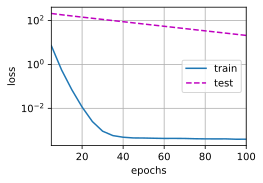

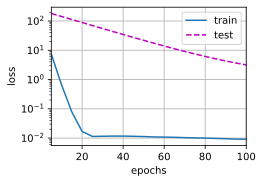

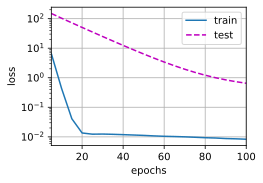

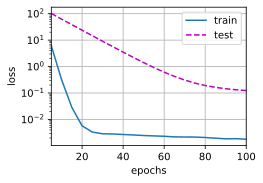

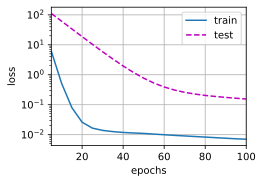

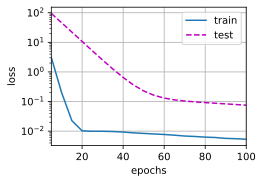

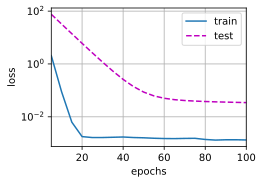

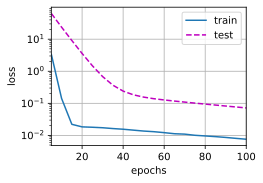

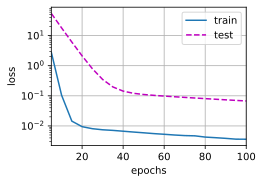

In [24]:
for wd in range(1,10):
    train_concise(wd)

In [25]:
loss_lamda

[tensor(0.0015, grad_fn=<MeanBackward0>),
 tensor(0.0685, grad_fn=<MeanBackward0>),
 tensor(0.0003, grad_fn=<MeanBackward0>),
 tensor(0.0005, grad_fn=<MeanBackward0>),
 tensor(0.0096, grad_fn=<MeanBackward0>),
 tensor(0.0166, grad_fn=<MeanBackward0>),
 tensor(0.0030, grad_fn=<MeanBackward0>),
 tensor(0.0158, grad_fn=<MeanBackward0>),
 tensor(0.0080, grad_fn=<MeanBackward0>),
 tensor(0.0030, grad_fn=<MeanBackward0>),
 tensor(0.0078, grad_fn=<MeanBackward0>),
 tensor(0.0041, grad_fn=<MeanBackward0>)]

Text(0.5, 0, 'lamda')

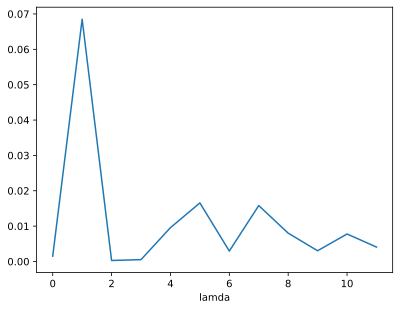

In [27]:
import matplotlib.pyplot as plt
data = [t.item() for t in loss_lamda]
plt.plot(data)
plt.xlabel('lamda')